

pip install tensorflow-datasets  
pip install git+https://github.com/tensorflow/datasets.git  

import tensorflow_datasets as tfds  
tfds.list_builders()  顯示TensorFlow Datasets目前提供的數據集  

model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)  
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', monitor='val_categorical_accuracy', save_best_only=True, mode='max')  
                                             

In [1]:
import sys,os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,utils,layers,models
from tensorflow.keras import optimizers,losses,metrics
from tensorflow.keras import callbacks
from IPython.display import Image
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

print(sys.version)
print(tf.__version__)

3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
2.0.0


In [1]:
# # 將train Data重新分成9:1等分，分別分給train data, valid data
# train_split, valid_split = ['train[:90%]', 'train[90%:]']
# # 取得訓練數據，並順便讀取data的資訊
# train_data, info = tfds.load("cifar10", split=train_split, with_info=True)
# # 取得驗證數據
# valid_data = tfds.load("cifar10", split=valid_split)
# # 取得測試數據
# test_data = tfds.load("cifar10", split="test")
# # 顯示Cifar10數據集資訊
# print(info)
# # Cifar10的十個標籤
# labels_dict = dict(enumerate(info.features['label'].names))
# labels_dict

In [5]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式
# batch_size = 64  # 批次大小
# train_num = int(info.splits['train'].num_examples / 10) * 9  # 訓練資料數量

# train_data = train_data.shuffle(train_num)  # 打散資料集
# # 載入前面的資料愈處理function，cpu數量為自動調整模式
# train_data = train_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# # 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
# train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# # 載入前面的資料愈處理function，cpu數量為自動調整模式
# valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# # 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
# valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# # 載入前面的資料愈處理function，cpu數量為自動調整模式
# test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# # 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
# test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [ ]:
# # 建立一個dict用來計數每個類別標籤數量
# train_dict = {}
# # 讀取整個訓練資料集
# for data in train_data:
#     # 將讀取到的label轉乘numpy格式
#     label = data['label'].numpy()
#     # 以label沒dict的key，取出dict中的值+1，如果key在dict中沒有值預設為0
#     train_dict[label] = train_dict.setdefault(label, 0) + 1
#     # train_dict.setdefault(label, 0) + 1
# print(train_dict)

# # 建立一個顯示影像的陣列
# output = np.zeros((32 * 8, 32 * 8, 3), dtype=np.uint8)
# row = 0
# # 每一次取8比資料，共取8次，所以總共取得64比資料
# for data in train_data.batch(8).take(8):
#     # 將取得的8比堆疊起來，放入顯示影像陣列第N列中
#     output[:, row*32:(row+1)*32] = np.vstack(data['image'].numpy())
#     row += 1
# # 設定顯示視窗大小
# plt.figure(figsize=(8, 8))
# # 顯示影像
# plt.imshow(output)

In [2]:
def data_normalize(train, test, scale=1):
    (x_train,y_train) = train
    (x_test,y_test) = test
    train_nums = x_train.shape[0] // scale
    test_nums = x_test.shape[0] // scale
    x_train, y_train = x_train[:train_nums], y_train[:train_nums]
    x_test, y_test = x_test[:test_nums], y_test[:test_nums]
    x_train = x_train.astype(np.float32) / 255.
    x_test = x_test.astype(np.float32) / 255.    
    
    #x_train = tf.reshape(x_train, shape=(-1,28*28))
    #x_test = tf.reshape(x_test, shape=(-1,28*28))
    y_train = utils.to_categorical(y_train).astype(np.int32)
    y_test = utils.to_categorical(y_test).astype(np.int32)
    print(x_train.shape,y_train.shape)
    print(x_test.shape,y_test.shape)
    
    return (x_train,y_train),(x_test,y_test)

(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
(x_train,y_train),(x_test,y_test) = data_normalize((x_train,y_train),(x_test,y_test),scale=10)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(5000, 32, 32, 3) (5000, 10)
(1000, 32, 32, 3) (1000, 10)


### 顯示數據集部分影像資料

(256, 256, 3)


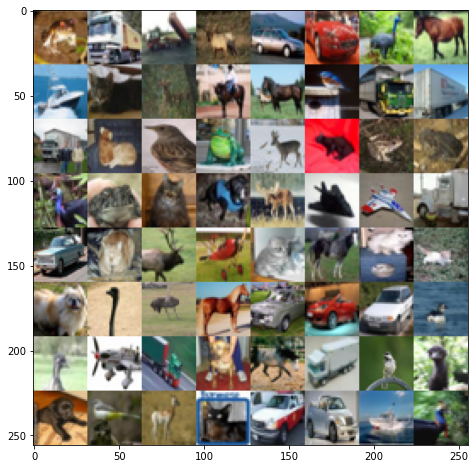

In [15]:
import matplotlib.pyplot as plt
import numpy as np
output = np.zeros((32 * 8, 32 * 8, 3), dtype=np.float32)
row = 0
print(output.shape)
for i in range(8):   
    for j in range(8):
        output[j*32:(j+1)*32,(i)*32:(i+1)*32,:]= x_train[i+j*8]
plt.figure(figsize=(8, 8))
plt.imshow(output)
plt.show()


In [3]:
def build_dnn_model():
    inputs = layers.Input(shape=(32,32,3))
    x = layers.Flatten()(inputs)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    model = models.Model(inputs, outputs, name="model-1")
    return model

model_1 = build_dnn_model()
model_1.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3289

In [75]:
model_dir = 'models/lab4-logs'  # 設定儲存權重目錄
os.makedirs(model_dir, exist_ok=True)  # 創建儲存權重目錄
# 儲存訓練記錄檔
log_dir = os.path.join("models","lab4-logs","model-1")
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', 
                                             monitor='val_categorical_accuracy', 
                                             save_best_only=True, 
                                             mode='max')
model_1.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])

batch_size = 128
epochs = 9
history_1 = model_1.fit(x_train, y_train, 
                batch_size=batch_size ,
                epochs=epochs, 
                validation_split=0.2,
                verbose=2,
                callbacks=[model_cbk, model_mckp])
print("Finish Training")

Train on 13332 samples, validate on 3334 samples
Epoch 1/9
13332/13332 - 2s - loss: 1.6702 - categorical_accuracy: 0.3992 - val_loss: 1.7316 - val_categorical_accuracy: 0.3863
Epoch 2/9
13332/13332 - 1s - loss: 1.6534 - categorical_accuracy: 0.4038 - val_loss: 1.7180 - val_categorical_accuracy: 0.3899
Epoch 3/9
13332/13332 - 1s - loss: 1.6060 - categorical_accuracy: 0.4201 - val_loss: 1.7021 - val_categorical_accuracy: 0.3971
Epoch 4/9
13332/13332 - 1s - loss: 1.6030 - categorical_accuracy: 0.4275 - val_loss: 1.6666 - val_categorical_accuracy: 0.4094
Epoch 5/9
13332/13332 - 1s - loss: 1.5941 - categorical_accuracy: 0.4245 - val_loss: 1.7218 - val_categorical_accuracy: 0.3956
Epoch 6/9
13332/13332 - 1s - loss: 1.5656 - categorical_accuracy: 0.4443 - val_loss: 1.7063 - val_categorical_accuracy: 0.3968
Epoch 7/9
13332/13332 - 1s - loss: 1.5290 - categorical_accuracy: 0.4486 - val_loss: 1.6730 - val_categorical_accuracy: 0.4037
Epoch 8/9
13332/13332 - 1s - loss: 1.5330 - categorical_accura


Model-1 Accuracy: 0.441344%
['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy']


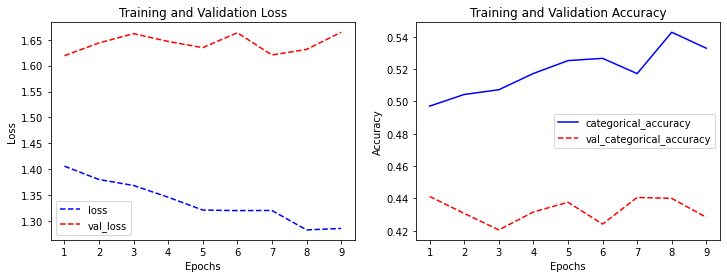

In [33]:
loss, acc = model_1.evaluate(x_test,y_test, batch_size=batch_size, verbose=0)
print('\nModel-1 Accuracy: {:.6f}%'.format(acc))

def visual_train_status(history):
    keys = [key for key in history.history.keys()]
    print(keys)
    plt.figure(figsize=(12,4))
    loss = history.history[keys[0]]
    val_loss = history.history[keys[2]]
    epochs = range(1, len(loss)+1)  
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, "b--", label=keys[0])
    plt.plot(epochs, val_loss, "r--", label=keys[2])
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # 顯示訓練和驗證準確度
    acc = history.history[keys[1]]
    val_acc = history.history[keys[3]]
    epochs = range(1, len(acc)+1)
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, "b-", label=keys[1])
    plt.plot(epochs, val_acc, "r--", label=keys[3])
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    
visual_train_status(history_1)

### 訓練Model-2（卷積神經網路）
* keras.Input：輸入層(輸入影像大小為32x32x3)  
* layers.Conv2D：卷積層(使用ReLU激活函數，以及3x3大小的kernel)  
* layers.MaxPool2D：池化層(對特徵圖下採樣)  
* layers.Flatten：扁平層(特徵圖轉成一維Tensor)  
* layers.Dropout：Dropout層(每次訓練隨機丟棄50%網路)  
* layers.Dense：全連接層(隱藏層使用ReLU激活函數，輸出層使用Softmax激活函數)  

In [5]:
def build_CNN_model():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    # 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
    model = models.Model(inputs, outputs, name='model-2')
    return model
    
model_2 = build_CNN_model()
model_2.summary()  # 顯示網路架構

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          7379

In [6]:
model_dir = 'models/lab4-logs'  # 設定儲存權重目錄
os.makedirs(model_dir, exist_ok=True)  # 創建儲存權重目錄
# 儲存訓練記錄檔
log_dir = os.path.join("models","lab4-logs","model-2")
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5', 
                                             monitor='val_categorical_accuracy', 
                                             save_best_only=True, 
                                             mode='max')
model_2.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])

batch_size = 128
epochs = 9
history_2 = model_2.fit(x_train, y_train, 
                batch_size=batch_size ,
                epochs=epochs, 
                validation_split=0.2,
                verbose=2,
                callbacks=[model_cbk, model_mckp])
print("Finish Training")

Train on 13332 samples, validate on 3334 samples
Epoch 1/9
13332/13332 - 21s - loss: 2.1679 - categorical_accuracy: 0.1881 - val_loss: 1.9020 - val_categorical_accuracy: 0.3083
Epoch 2/9
13332/13332 - 18s - loss: 1.9375 - categorical_accuracy: 0.2799 - val_loss: 1.6996 - val_categorical_accuracy: 0.3872
Epoch 3/9
13332/13332 - 19s - loss: 1.8025 - categorical_accuracy: 0.3279 - val_loss: 1.5784 - val_categorical_accuracy: 0.4292
Epoch 4/9
13332/13332 - 19s - loss: 1.6929 - categorical_accuracy: 0.3699 - val_loss: 1.6158 - val_categorical_accuracy: 0.4217
Epoch 5/9
13332/13332 - 19s - loss: 1.6588 - categorical_accuracy: 0.3766 - val_loss: 1.4996 - val_categorical_accuracy: 0.4715
Epoch 6/9
13332/13332 - 19s - loss: 1.5896 - categorical_accuracy: 0.4095 - val_loss: 1.4273 - val_categorical_accuracy: 0.4865
Epoch 7/9
13332/13332 - 18s - loss: 1.5486 - categorical_accuracy: 0.4245 - val_loss: 1.3987 - val_categorical_accuracy: 0.5036
Epoch 8/9
13332/13332 - 18s - loss: 1.4966 - categorica


Model-2 Accuracy: 0.539454%
['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy']


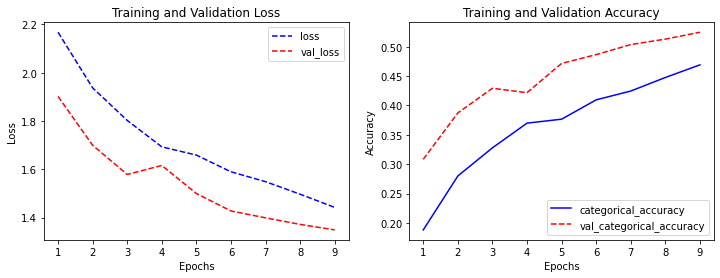

In [8]:
loss, acc = model_2.evaluate(x_test,y_test, batch_size=batch_size, verbose=0)
print('\nModel-2 Accuracy: {:.6f}%'.format(acc))   

visual_train_status(history_2)

### 影像增強(Image Augmentation)
水平翻轉

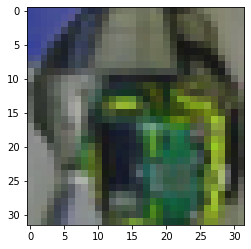

In [58]:
# x = 3
# y = 7
# image_test = output[y*32:(y+1)*32, x*32:(x+1)*32, :]
image_test = x_train[14]
plt.imshow(image_test)
plt.show()

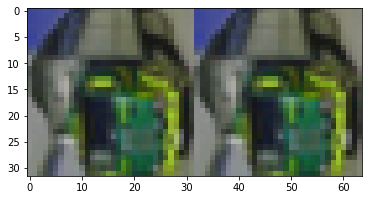

In [59]:
# 水平翻轉
def flip(x):
    x = tf.image.random_flip_left_right(x)  # 隨機左右翻轉影像
    return x
image_2 = flip(image_test)
image = np.hstack((image_test, image_2))
plt.imshow(image)
plt.show()

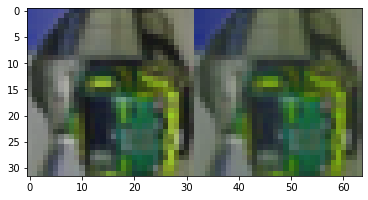

In [60]:
# 顏色轉換
def color(x):
    x = tf.image.random_hue(x, 0.08)  # 隨機調整影像色調
    x = tf.image.random_saturation(x, 0.6, 1.6)  # 隨機調整影像飽和度
    x = tf.image.random_brightness(x, 0.05)  # 隨機調整影像亮度
    x = tf.image.random_contrast(x, 0.7, 1.3)  # 隨機調整影像對比度
    return x

image_2 = color(image_test)
image = np.hstack((image_test, image_2))
plt.imshow(image)
plt.show()

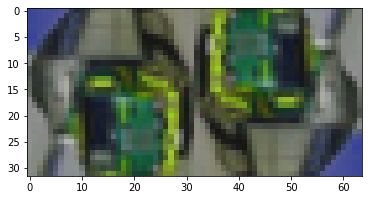

In [61]:
# 影像旋轉
def rotate(x):
    # 隨機選轉n次(通過minval和maxval設定n的範圍)，每次選轉90度
    x = tf.image.rot90(x, tf.random.uniform(shape=[], minval=1, maxval=4, dtype=tf.int32))
    return x

image_2 = rotate(image_test)
image = np.hstack((image_test, image_2))
plt.imshow(image)
plt.show()

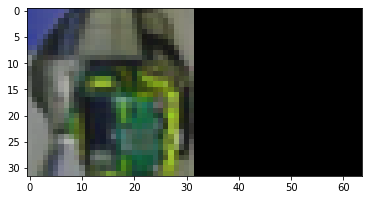

In [64]:
# 影像縮放
def zoom(x, scale_min=0.6, scale_max=1.4):
    h, w, c = x.shape
    scale = tf.random.uniform([], scale_min, scale_max)  # 隨機縮放比例
    sh = h * scale  # 縮放後影像長度
    sw = w * scale  # 縮放後影像寬度
    x = tf.image.resize(x, (sh, sw))  # 影像縮放
    x = tf.image.resize_with_crop_or_pad(x, h, w)  # 影像裁減和填補
    return x

image_2 = zoom(image_test)
# 因為處理後影像會變成float型態，所以需轉換回來不然顯示時會出現問題
image_2 = tf.cast(image_2, dtype=tf.uint8)
image = np.hstack((image_test, image_2))  # 將原始圖和處理後水平合併
plt.imshow(image)
plt.show()

### Dataset 設定 (Augmentation)
重新載入一次Dataset(因為前面已經對Dataset設定過了)
* 標準化：將影像全部除以255，將像素值縮放到0~1之間。
* 影像增強：將影像水平翻轉、影像旋轉、顏色轉換和影像縮放。
* 標籤資料：做One-hot Encoding，例如類別2為[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]。

In [65]:
def parse_aug_fn(train_data):
    for i in range(len(train_data)):
        x = flip(train_data[i])  # 隨機水平翻轉
        # 觸發顏色轉換機率50%
        x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: color(x), lambda: x)
        # 觸發影像旋轉機率0.25%
        x = tf.cond(tf.random.uniform([], 0, 1) > 0.75, lambda: rotate(x), lambda: x)
        # 觸發影像縮放機率50%
        x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: zoom(x), lambda: x)
        train_data[i] = x
    return train_data

def data_normalize(train, test, scale=1):
    (x_train,y_train) = train
    (x_test,y_test) = test
    train_nums = x_train.shape[0] // scale
    test_nums = x_test.shape[0] // scale
    x_train, y_train = x_train[:train_nums], y_train[:train_nums]
    x_test, y_test = x_test[:test_nums], y_test[:test_nums]
   
    x_train = parse_aug_fn(x_train)
    x_test = parse_aug_fn(x_test)
    
    x_train = x_train.astype(np.float32) / 255.
    x_test = x_test.astype(np.float32) / 255. 
    #x_train = tf.reshape(x_train, shape=(-1,28*28))
    #x_test = tf.reshape(x_test, shape=(-1,28*28))
    y_train = utils.to_categorical(y_train).astype(np.int32)
    y_test = utils.to_categorical(y_test).astype(np.int32)
    print(x_train.shape,y_train.shape)
    print(x_test.shape,y_test.shape)
    
    return (x_train,y_train),(x_test,y_test)

(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
(x_train,y_train),(x_test,y_test) = data_normalize((x_train,y_train),(x_test,y_test),scale=10)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(16666, 32, 32, 3) (16666, 10)
(3333, 32, 32, 3) (3333, 10)


(256, 256, 3)


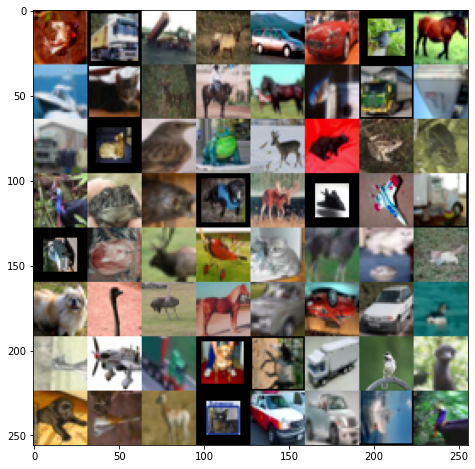

In [66]:
import matplotlib.pyplot as plt
import numpy as np
output = np.zeros((32 * 8, 32 * 8, 3), dtype=np.float32)
row = 0
print(output.shape)
for i in range(8):   
    for j in range(8):
        output[j*32:(j+1)*32,(i)*32:(i+1)*32,:]= x_train[i+j*8]
plt.figure(figsize=(8, 8))
plt.imshow(output)
plt.show()

### 訓練Model-3（使用影增強方法訓練卷積神經網路）
* keras.Input：輸入層(輸入影像大小為32x32x3)
* layers.Conv2D：卷積層(使用ReLU激活函數，以及3x3大小的kernel)
* layers.MaxPool2D：池化層(對特徵圖下採樣)
* layers.Flatten：扁平層(特徵圖轉成一維Tensor)
* layers.Dropout：Dropout層(每次訓練隨機丟棄50%網路)
* layers.Dense：全連接層(隱藏層使用ReLU激活函數，輸出層使用Softmax激活函數)

In [7]:
def build_CNN2_model():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    # 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
    model = models.Model(inputs, outputs, name='model-3')
    return model
    
model_3 = build_CNN2_model()
model_3.summary()  # 顯示網路架構

Model: "model-3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 64)          7379

In [70]:
model_dir = 'models/lab4-logs'  # 設定儲存權重目錄
os.makedirs(model_dir, exist_ok=True)  # 創建儲存權重目錄
# 儲存訓練記錄檔
log_dir = os.path.join("models","lab4-logs","model-3")
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-3.h5', 
                                             monitor='val_categorical_accuracy', 
                                             save_best_only=True, 
                                             mode='max')
model_3.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])

batch_size = 128
epochs = 9
history_3 = model_3.fit(x_train, y_train, 
                batch_size=batch_size ,
                epochs=epochs, 
                validation_split=0.2,
                verbose=2,
                callbacks=[model_cbk, model_mckp])
print("Finish Training")

Train on 13332 samples, validate on 3334 samples
Epoch 1/9
13332/13332 - 20s - loss: 2.2318 - categorical_accuracy: 0.1491 - val_loss: 2.1194 - val_categorical_accuracy: 0.1821
Epoch 2/9
13332/13332 - 19s - loss: 2.1460 - categorical_accuracy: 0.1870 - val_loss: 2.0980 - val_categorical_accuracy: 0.2058
Epoch 3/9
13332/13332 - 19s - loss: 2.0905 - categorical_accuracy: 0.2060 - val_loss: 2.0235 - val_categorical_accuracy: 0.2567
Epoch 4/9
13332/13332 - 19s - loss: 2.0243 - categorical_accuracy: 0.2404 - val_loss: 1.9577 - val_categorical_accuracy: 0.3002
Epoch 5/9
13332/13332 - 19s - loss: 1.9588 - categorical_accuracy: 0.2694 - val_loss: 1.9887 - val_categorical_accuracy: 0.2909
Epoch 6/9
13332/13332 - 19s - loss: 1.9171 - categorical_accuracy: 0.2904 - val_loss: 1.8918 - val_categorical_accuracy: 0.3197
Epoch 7/9
13332/13332 - 19s - loss: 1.8766 - categorical_accuracy: 0.2988 - val_loss: 1.7645 - val_categorical_accuracy: 0.3728
Epoch 8/9
13332/13332 - 18s - loss: 1.8320 - categorica


Model-2 Accuracy: 0.392139%
['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy']


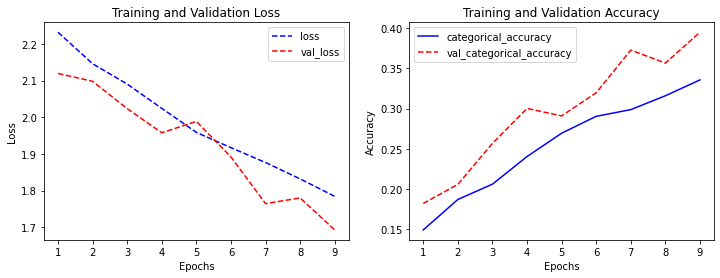

In [71]:
loss, acc = model_3.evaluate(x_test,y_test, batch_size=batch_size, verbose=0)
print('\nModel-2 Accuracy: {:.6f}%'.format(acc))   

visual_train_status(history_3)

### 比較三種網路的訓練結果

In [4]:
batch_size = 128
epochs = 9
x_test = x_test[1000:2000]
y_test = y_test[1000:2000]
#model_1 = build_dnn_model()
model_1.load_weights('models/lab4-logs/Best-model-1.h5')
model_1.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])
loss_1, acc_1 = model_1.evaluate(x_test,y_test, batch_size=batch_size, verbose=2)
print("Finish Evaluating")

100/1 - 0s - loss: 1.6709 - categorical_accuracy: 0.3800
Finish Evaluating


In [6]:
#model_2 = build_CNN_model()
model_2.load_weights('models/lab4-logs/Best-model-2.h5')
model_2.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])
loss_2, acc_2 = model_2.evaluate(x_test,y_test, batch_size=batch_size, verbose=2)
print("Finish Evaluating")

100/1 - 0s - loss: 1.3964 - categorical_accuracy: 0.4800
Finish Evaluating


In [8]:

#model_3 = build_CNN2_model()
model_3.load_weights('models/lab4-logs/Best-model-3.h5')
model_3.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])
loss_3, acc_3 = model_3.evaluate(x_test,y_test, batch_size=batch_size, verbose=2)
print("Finish Evaluating")

100/1 - 0s - loss: 1.6527 - categorical_accuracy: 0.3600
Finish Evaluating


In [9]:
loss = [loss_1, loss_2, loss_3]  
acc = [acc_1, acc_2, acc_3]
dict = {"Loss": loss,  
        "Accuracy": acc}
df = pd.DataFrame(dict)
print(df)

       Loss  Accuracy
0  1.670888      0.38
1  1.396365      0.48
2  1.652679      0.36
